# Goal: create a plot of period vs amplitude


Mass of the planet = $m_p$ = 10% of 15 Jupiter masses \
distance = $d$ = 10 pc\
stellar mass = $m_*$ = 0.4 $M_\odot$ 

We find the semi-major axis of the planets orbit Keplers law (equation 55 from Wright and Howard)
### ${a_p}^3=\varpi^3\frac{{m_p}^3}{(m_*+m_p)^2}P^2=\frac{1}{d^3}\frac{{m_p}^3}{(m_*+m_p)^2}P^2 \longrightarrow a_p=\frac{m_p}{d}\left(\frac{P}{m_*+m_p}\right)^{2/3}$

The sensitivity is calculated using equation 2 from Ranalli:
### $\nu = \left(\frac{M_p}{M_*}\right)\left(\frac{a_p}{AU}\right)\left(\frac{d}{pc}\right)^{-1}$ arcsec

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# N is the number of data points (some arbitrary number I chose)
N = 30 

# period ranges from 0.1 to 10 years in log space
period = np.logspace(-1, 1, N)

In [3]:
# making sensitivity data 
m_star   = 0.4 
m_planet = 1.5
distance = 10

# a_planet = m_planet/distance * (period/(m_star+m_planet))**(2/3)

# amplitude = (m_planet/m_star)*a_planet*distance**(-1)

In [4]:
def astrometric_amplitude(m_planet, m_star, distance, P):
    M = m_planet/m_star * 0.000954 # unitless
    
    a = (P**2/m_star)**(1/3) # AU
    
    return M*a/distance*1e6 # uas

In [5]:
astrometric_amplitude(m_planet, m_star, distance, 1)

485.54145116841386

In [6]:
# period_test = 1

# a_planet_test = m_planet/distance * (period_test/(m_star+m_planet))**(2/3)

# amplitude_test = (m_planet/m_star)*a_planet_test*distance**(-1)

# print(amplitude_test, 'arcseconds')
# print(amplitude_test*1e6, 'microarcseconds')

In [7]:
amplitude = astrometric_amplitude(m_planet, m_star, distance, period)
amplitude

array([ 104.60673458,  116.28847007,  129.27473861,  143.71122118,
        159.75986736,  177.60071211,  197.4338954 ,  219.48190741,
        243.99208446,  271.23938361,  301.52946717,  335.20213164,
        372.63511958,  414.24835715,  460.50866488,  511.93499446,
        569.10425046,  632.65776202,  703.30847734,  781.84896162,
        869.16028811,  966.22192201, 1074.12270826, 1194.07308624,
       1327.41866857, 1475.65533631, 1640.4460199 , 1823.63935397,
       2027.29041555, 2253.683778  ])

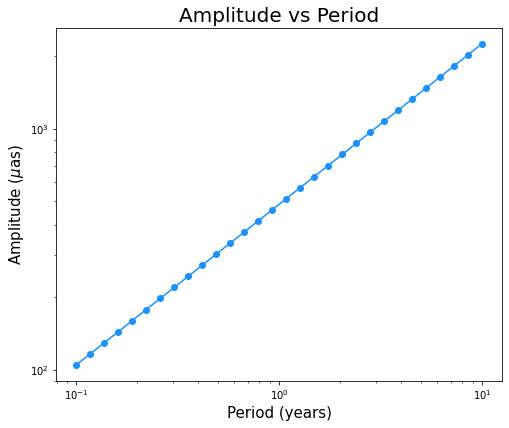

In [8]:
plt.figure(figsize=(8,6.5))

plt.plot(period, amplitude, color='dodgerblue', marker='o')

plt.title('Amplitude vs Period', fontsize=20)
plt.xlabel('Period (years)', fontsize=15)
plt.ylabel('Amplitude ($\mu$as)', fontsize=15)

plt.xscale('log')
plt.yscale('log')